In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [5]:
#df = pd.read_csv('CO_2010_clean.csv')

In [6]:
df.head()

,Age,City,StateProvinceCode,PostalCode,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,IsWinterGuest,...,March,April,November,December,Ski_Resort1,Ski_Resort2,Ski_Resort3,Ski_Resort4,Ski_Resort5,Pass_Winter_2011
0,22,Fort Collins,CO,80526,1261.08,8.79,1070.79,23.0,9.36,True,...,0,0,0,0,0,0,0,0,2,0
1,57,Fraser,CO,80442,8243.34,1197.00,3382.34,16.0,10.00,True,...,0,0,0,0,0,0,0,0,10,1
2,68,Denver,CO,80211,4691.67,918.03,2199.67,13.0,0.00,True,...,1,0,1,1,0,0,0,0,5,1
3,39,Fort Collins,CO,80525,3798.48,678.00,1406.48,13.0,10.00,True,...,0,0,1,5,0,0,0,0,9,1
4,31,Parker,CO,80138,2641.13,0.00,886.13,21.0,6.57,True,...,0,2,0,1,0,0,0,0,3,1


In [7]:
df.shape

(14115, 32)

In [ ]:
#X = ['Age', 'City', 'StateProvinceCode', 'PostalCode', 'CustomerLifetimeSpend', 'Customer1YearSpend',
#    'Customer3YearSpend', 'ThreeYearVisitCount', 'SkiLoyaltyIndexRating', 'IsWinterGuest',
#    'IsSummerGuest', 'FrontRangeMarket', 'Spend_Winter_2010', 'Household1YearSpend',
#    'Household3YearSpend', 'HouseholdLifetimeSpend', 'NumberOfHouseholdMembers', 'NumberOfAdults', 
#    'NumberOfChildren', 'Pass_Winter_2010', 'January', 'February', 'March', 'April', 'November',
#    'December', 'Ski_Resort1', 'Ski_Resort2', 'Ski_Resort3', 'Ski_Resort4', 'Ski_Resort5']

In [31]:
X = ['Age', 'CustomerLifetimeSpend', 'Customer1YearSpend',
    'Customer3YearSpend', 'ThreeYearVisitCount', 'SkiLoyaltyIndexRating', 'Spend_Winter_2010', 'Household1YearSpend',
    'Household3YearSpend', 'HouseholdLifetimeSpend', 'NumberOfHouseholdMembers', 'NumberOfAdults', 
    'NumberOfChildren', 'Pass_Winter_2010', 'January', 'February', 'March', 'April', 'November',
    'December', 'Ski_Resort1', 'Ski_Resort2', 'Ski_Resort3', 'Ski_Resort4', 'Ski_Resort5']

In [28]:
df['IsWinterGuest'].unique()

array(['True', '0', 'False'], dtype=object)

In [11]:
y = ['Pass_Winter_2011']

In [12]:
df[y].mean()

Pass_Winter_2011    0.564435
dtype: float64

In [13]:
df['Pass_Winter_2010'].mean()

0.5049946865037195

#### Mean of Winter 2011 passes based on if they had a 2010 Pass

In [19]:
df.groupby('Pass_Winter_2010')['Pass_Winter_2011'].mean()

Pass_Winter_2010
0    0.535280
1    0.593013
Name: Pass_Winter_2011, dtype: float64

In [35]:
#df.corr().nlargest(21, X)[X]
df[X].corr()#.nlargest(21,X)

,Age,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,Spend_Winter_2010,Household1YearSpend,Household3YearSpend,HouseholdLifetimeSpend,...,February,March,April,November,December,Ski_Resort1,Ski_Resort2,Ski_Resort3,Ski_Resort4,Ski_Resort5
Age,1.000000,-0.010128,0.071985,0.122997,0.088218,0.050018,0.031756,0.007790,0.038763,-0.033547,...,0.000178,0.046680,0.012195,-0.101180,-0.110123,-0.012748,NaN,NaN,NaN,-0.046814
CustomerLifetimeSpend,-0.010128,1.000000,0.440597,0.465540,0.066159,0.000152,0.841284,0.317843,0.342248,0.992470,...,0.363830,0.035120,0.003764,0.004797,0.018137,0.000438,NaN,NaN,NaN,0.115517
Customer1YearSpend,0.071985,0.440597,1.000000,0.814290,0.350268,0.073981,0.184946,0.749059,0.655490,0.426628,...,0.107039,0.050968,0.020902,0.022261,0.033578,-0.002565,NaN,NaN,NaN,0.072252
Customer3YearSpend,0.122997,0.465540,0.814290,1.000000,0.481538,0.105014,0.239953,0.629337,0.780744,0.441631,...,0.157433,0.084732,0.047495,0.042799,0.048583,-0.000578,NaN,NaN,NaN,0.108808
ThreeYearVisitCount,0.088218,0.066159,0.350268,0.481538,1.000000,0.086895,0.009910,0.485792,0.646003,0.090821,...,0.129629,0.144226,0.132958,0.105379,0.112739,-0.001848,NaN,NaN,NaN,0.171920
SkiLoyaltyIndexRating,0.050018,0.000152,0.073981,0.105014,0.086895,1.000000,-0.001929,0.066062,0.086374,-0.003770,...,-0.032803,-0.025993,-0.009122,-0.037211,-0.036418,-0.014889,NaN,NaN,NaN,-0.039160
Spend_Winter_2010,0.031756,0.841284,0.184946,0.239953,0.009910,-0.001929,1.000000,0.124055,0.164579,0.836930,...,0.408404,0.081116,0.012693,-0.023338,0.011327,-0.001495,NaN,NaN,NaN,0.133203
Household1YearSpend,0.007790,0.317843,0.749059,0.629337,0.485792,0.066062,0.124055,1.000000,0.850994,0.356316,...,0.098121,0.055988,0.025911,0.042156,0.052027,-0.004482,NaN,NaN,NaN,0.083795
Household3YearSpend,0.038763,0.342248,0.655490,0.780744,0.646003,0.086374,0.164579,0.850994,1.000000,0.378872,...,0.152471,0.096440,0.052985,0.072534,0.082091,-0.003801,NaN,NaN,NaN,0.132386
HouseholdLifetimeSpend,-0.033547,0.992470,0.426628,0.441631,0.090821,-0.003770,0.836930,0.356316,0.378872,1.000000,...,0.363640,0.032967,0.003652,0.006410,0.019504,-0.000414,NaN,NaN,NaN,0.115778


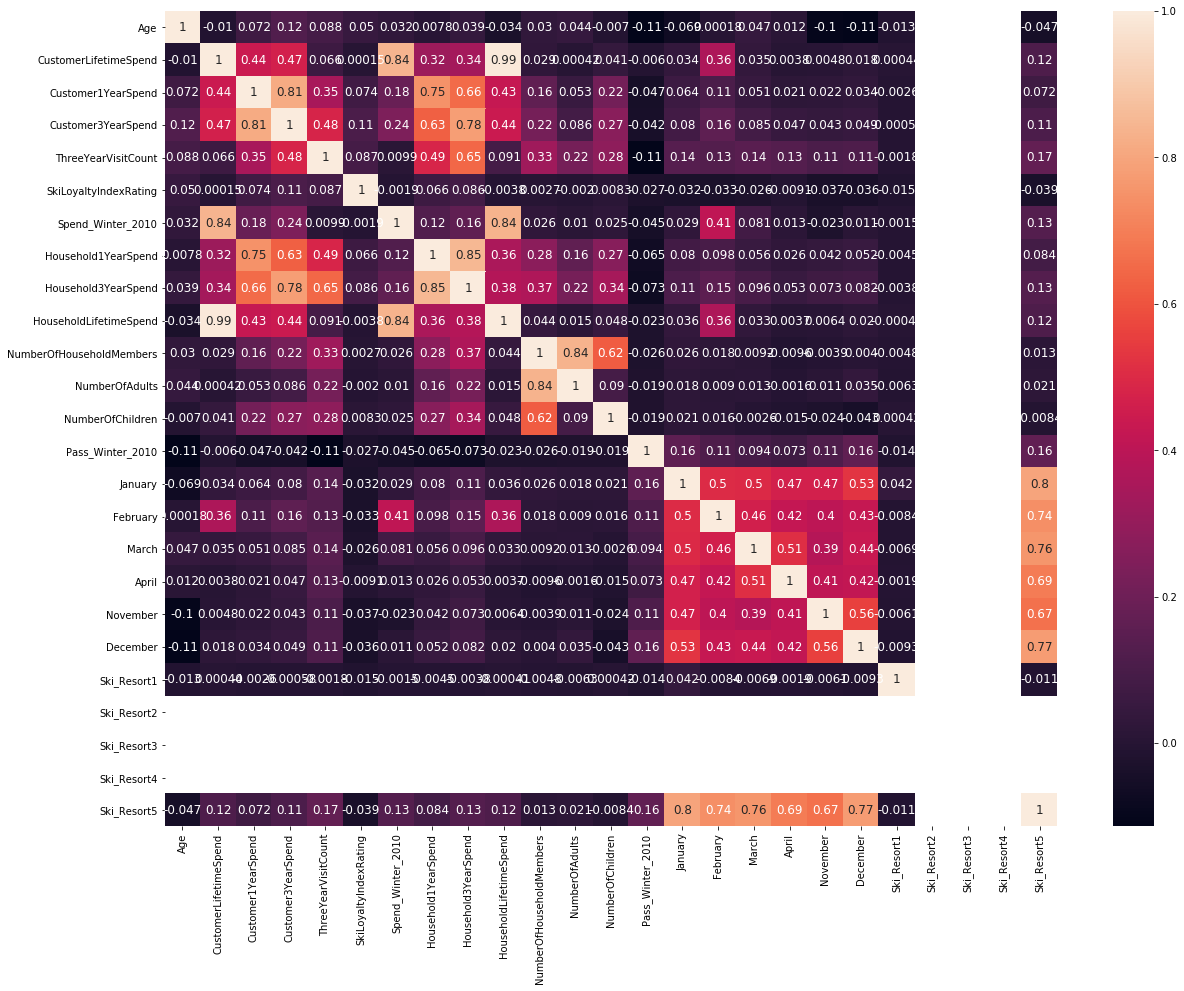

In [36]:

corr = df[X].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [37]:
df.corr().nlargest(21, 'Pass_Winter_2011')['Pass_Winter_2011']

Pass_Winter_2011            1.000000
Age                         0.203581
Customer3YearSpend          0.153160
Customer1YearSpend          0.086272
ThreeYearVisitCount         0.077395
Household3YearSpend         0.076732
Pass_Winter_2010            0.058216
March                       0.043024
Ski_Resort5                 0.043018
February                    0.039924
April                       0.035568
CustomerLifetimeSpend       0.033483
Household1YearSpend         0.031268
December                    0.026496
January                     0.024627
SkiLoyaltyIndexRating       0.024409
NumberOfHouseholdMembers    0.017504
November                    0.017356
NumberOfChildren            0.016613
NumberOfAdults              0.010874
Spend_Winter_2010           0.001214
Name: Pass_Winter_2011, dtype: float64

In [40]:
df[X].shape

(14115, 25)

In [41]:
df[y].shape

(14115, 1)

In [42]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], random_state =42)

In [43]:
y_train.mean()

Pass_Winter_2011    0.56792
dtype: float64

In [44]:
y_test.mean()

Pass_Winter_2011    0.553981
dtype: float64

In [45]:
### Scale Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Fit Scaler on X_train data from TTS
ss.fit(X_train)
# Transform X_Train data from TTS
X_train_s = ss.transform(X_train)
#Transform X_test from TTS
X_test_s = ss.transform(X_test)

In [47]:
### THIS IS HELPFUL AND USED AGAIN
# Step 1: Instantiate our model.
logreg = LogisticRegression()

# Step 2: Fit our model.
logreg.fit(X_train_s, y_train)

# After fitting: Print out intercept and coefficients.
print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
print('Logreg score:', logreg.score(X_test_s,y_test))

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logreg intercept: [0.38720474]
Logreg coef(s): [[ 3.01856991e-01  1.35800533e+01 -1.87729044e-01 -8.31939659e-01
   4.17181184e-02 -1.90219523e-02 -5.81459272e-01 -6.21391057e-02
   1.58107028e+00 -1.34897640e+01 -3.52445491e-01  2.48629263e-01
   9.12877766e-02  2.38798264e-02 -3.76946020e-02  2.20384743e-02
   2.16990060e-03  2.71139152e-02 -2.02562714e-02  4.52117560e-02
  -1.25702630e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.30012013e-02]]
Logreg score: 0.7200340039671295


In [50]:
list(zip(np.exp(logreg.coef_[0]),df[X].columns))

[(1.3523678115360462, 'Age'),
 (790209.4630051666, 'CustomerLifetimeSpend'),
 (0.8288392557434975, 'Customer1YearSpend'),
 (0.4352043192222058, 'Customer3YearSpend'),
 (1.042600547457833, 'ThreeYearVisitCount'),
 (0.9811578232900345, 'SkiLoyaltyIndexRating'),
 (0.5590819183766862, 'Spend_Winter_2010'),
 (0.9397521528622693, 'Household1YearSpend'),
 (4.860154776603105, 'Household3YearSpend'),
 (1.3850642402607112e-06, 'HouseholdLifetimeSpend'),
 (0.7029668866979396, 'NumberOfHouseholdMembers'),
 (1.2822665607587211, 'NumberOfAdults'),
 (1.0955842434598229, 'NumberOfChildren'),
 (1.0241672326324718, 'Pass_Winter_2010'),
 (0.9630069963898025, 'January'),
 (1.0222831153669467, 'February'),
 (1.0021722565367104, 'March'),
 (1.02748484222184, 'April'),
 (0.979947508631039, 'November'),
 (1.0462493859911703, 'December'),
 (0.8818770514387312, 'Ski_Resort1'),
 (1.0, 'Ski_Resort2'),
 (1.0, 'Ski_Resort3'),
 (1.0, 'Ski_Resort4'),
 (1.013086084354918, 'Ski_Resort5')]

In [51]:
y_preds = logreg.predict(X_test_s)

In [59]:
confusion_matrix = confusion_matrix(y_test, y_preds)
print('Intercept: ' + str(logreg.intercept_))
print('Regression: ' + str(logreg.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_s, y_test)))
print(classification_report(y_test, y_preds))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No Renew', 'Renew'), ('No Renew', 'Renew'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

TypeError: 'numpy.ndarray' object is not callable

In [53]:
tree = DecisionTreeClassifier(criterion='gini')
model = tree.fit(X_train, y_train)

In [58]:
model.score(X_train, y_train)

1.0

In [57]:
model.score(X_test, y_test)

0.7001983564749221